In [37]:
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


加载试验数据

In [38]:
def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:
        dataset = pickle.load(f, encoding='latin1')
        X = dataset['data']
        X = np.reshape(X, (10000, 3, 32, 32)).transpose(0, 2, 3, 1).astype('float')
        Y = dataset['labels']
        Y = np.array(Y)
    return X, Y

path = '../cs231n/datasets/cifar-10-batches-py'
xs = []
ys = []
for i in range(1,6):
    filename = os.path.join(path, 'data_batch_%d' % (i, ))
    X, Y = load_CIFAR_batch(filename)
    xs.append(X)
    ys.append(Y)
Xtr = np.concatenate(xs)
Ytr = np.concatenate(ys)
filename_test = os.path.join(path, 'test_batch')
Xtest, Ytest = load_CIFAR_batch(filename_test)
print(Xtr.shape)
print(Ytest.shape)

(50000, 32, 32, 3)
(10000,)


画出训练集的部分图像

In [39]:
def plot_image(Xtr, Ytr, classes):
    num_row = 7
    num_column = len(classes)
    for i in range(num_column):
        index_total = np.where(Ytr == i)[0]
        index_use = index_total[0:num_row]
        for j, idx in enumerate(index_use):
            index = j * 10 + i + 1
            plt.subplot(num_row, num_column, index)
            plt.imshow(Xtr[idx].astype('uint8'))
            plt.axis('off')
            if j == 0:
                plt.title(classes[i])
    plt.show()
      
# classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# plot_image(Xtr, Ytr, classes)

取实验数据的一部分进行训练以减少计算量

In [40]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

X_train = Xtr[0: num_training]

Y_train = Ytr[0: num_training]

X_val = Xtr[num_training: num_training + num_validation]
Y_val = Ytr[num_training: num_training + num_validation]

dev_index = np.random.choice(range(num_training), num_dev)
X_dev = Xtr[dev_index]
Y_dev = Ytr[dev_index]

X_test = Xtest[0: num_test]
Y_test = Ytest[0: num_test]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', Y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', Y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', Y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


对数据进行处理

In [41]:
#将X参数扁平化
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

#将X减去训练集中X参数的平均数
X_mean = np.mean(X_train, axis=0)

X_train -= X_mean
X_val -= X_mean
X_dev -= X_mean
X_test -= X_mean

#给X添加bias
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
print(type(X_test))

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)


<class 'numpy.ndarray'>
(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [42]:
from classifiers import Linear_SVM
import sys
sys.path.append("..")
from cs231n.classifiers import linear_svm

W = np.random.randn(3073, 10) * 0.0001 
loss1, grad1= Linear_SVM.svm_loss(W, X_dev, Y_dev, 0.0)
loss, grad = linear_svm.svm_loss_vectorized(W, X_dev, Y_dev, 0.0)

进行梯度检验，防止grad函数编写错误

In [43]:
#由于gradient check运行很慢，故一般情况下不运行
import Gradient_Check

# f = lambda w: linear_svm.svm_loss_vectorized(w, X_dev, Y_dev, 0.0)[0]
# Gradient_Check.GradientCheck(f, W, grad)

开始进行梯度下降操作

In [44]:
from classifiers.Linear_Classifier import LinearSVM
svm = LinearSVM()
loss_history = svm.train(X_train, Y_train, learning_rate=1e-7, 
                         reg=2.5e4,iteration=1500, verbose= True)

iteration 0 / 1500: loss 800.066650
iteration 100 / 1500: loss 289.556981
iteration 200 / 1500: loss 108.860655
iteration 300 / 1500: loss 42.969154
iteration 400 / 1500: loss 18.725462
iteration 500 / 1500: loss 9.999963
iteration 600 / 1500: loss 7.532824
iteration 700 / 1500: loss 5.825426
iteration 800 / 1500: loss 5.931081
iteration 900 / 1500: loss 5.552854
iteration 1000 / 1500: loss 5.821555
iteration 1100 / 1500: loss 5.416055
iteration 1200 / 1500: loss 5.599312
iteration 1300 / 1500: loss 4.962316
iteration 1400 / 1500: loss 4.737654


并画出梯度下降的曲线图

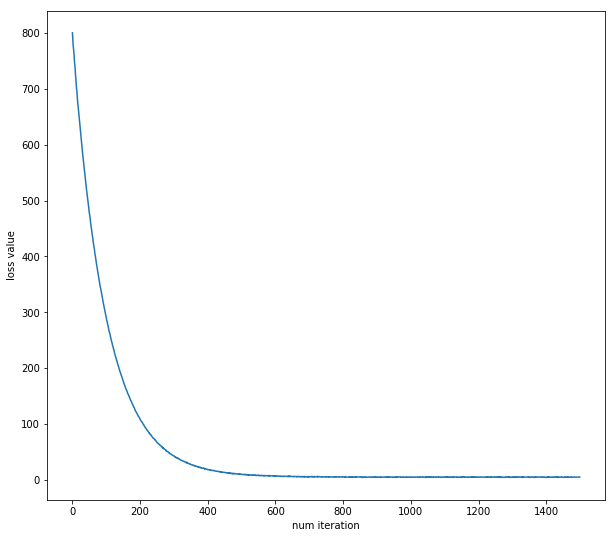

In [45]:
plt.plot(loss_history)
plt.xlabel('num iteration')
plt.ylabel('loss value')
plt.show()

对训练的准确率进行预测

In [46]:
#首先是训练集
Y_train_pre = svm.predict(X_train)
accuracy_train = np.mean(Y_train_pre == Y_train)
print('在训练集上使用SVM用SGD收敛的准确度是%f' % (accuracy_train, ))

#接着是交叉集
Y_val_pre = svm.predict(X_val)
accuracy_val = np.mean(Y_val_pre == Y_val)
print('在交叉集上使用SVM用SGD收敛的准确度是%f' % (accuracy_val, ))

在训练集上使用SVM用SGD收敛的准确度是0.370082
在交叉集上使用SVM用SGD收敛的准确度是0.370000


在validation训练集上寻找效果最好的超参数learning_rate & reg

In [47]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [1.5e4, 5e4]
range_lr = np.linspace(learning_rates[0],learning_rates[1],3)
range_reg = np.linspace(regularization_strengths[0],regularization_strengths[1],3)
result = {}
best_val = 0
best_svm = None

for lr in range_lr:
    for reg in range_reg:
        temp_svm = LinearSVM()
        temp_svm.train(X_train, Y_train, reg=reg, 
                       learning_rate=lr, iteration= 1500)
        Y_train_pre_temp = temp_svm.predict(X_train)
        accuracy_train_temp = np.mean(Y_train_pre_temp == Y_train)
        Y_val_pre_temp = temp_svm.predict(X_val)
        accuracy_val_temp = np.mean(Y_val_pre_temp == Y_val)
        result[(lr, reg)] = (accuracy_train_temp, accuracy_val_temp)
        if accuracy_val_temp > best_val:
            best_val = accuracy_val_temp
            best_svm = temp_svm

for lr, reg in sorted(result):
    train_accuracy, val_accuracy = result[(lr, reg)]
    print('le %e re %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
print('best validation accuracy achieved during cross-validation: %f' % best_val)

le 1.000000e-07 re 1.500000e+04 train accuracy: 0.377082 val accuracy: 0.387000
le 1.000000e-07 re 3.250000e+04 train accuracy: 0.365837 val accuracy: 0.383000
le 1.000000e-07 re 5.000000e+04 train accuracy: 0.354898 val accuracy: 0.372000
le 2.505000e-05 re 1.500000e+04 train accuracy: 0.186510 val accuracy: 0.194000
le 2.505000e-05 re 3.250000e+04 train accuracy: 0.099959 val accuracy: 0.107000
le 2.505000e-05 re 5.000000e+04 train accuracy: 0.049041 val accuracy: 0.053000
le 5.000000e-05 re 1.500000e+04 train accuracy: 0.144286 val accuracy: 0.144000
le 5.000000e-05 re 3.250000e+04 train accuracy: 0.100265 val accuracy: 0.087000
le 5.000000e-05 re 5.000000e+04 train accuracy: 0.100265 val accuracy: 0.087000
best validation accuracy achieved during cross-validation: 0.387000


将训练出来的W可视化

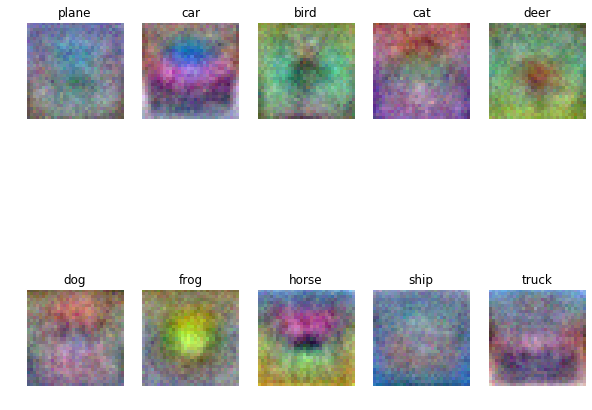

In [48]:
W_best = best_svm.W[:-1,:]
W_best = np.reshape(W_best, (32, 32, 3, -1))
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
w_min = np.min(W_best)
w_max = np.max(W_best)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    #把W的范围扩大至0-255
    wimg = 255.0 * (W_best[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.title(classes[i])
    plt.axis('off')


将模型在测试集上进行预测并打印部分预测结果

在测试集上的准确度为0.376000


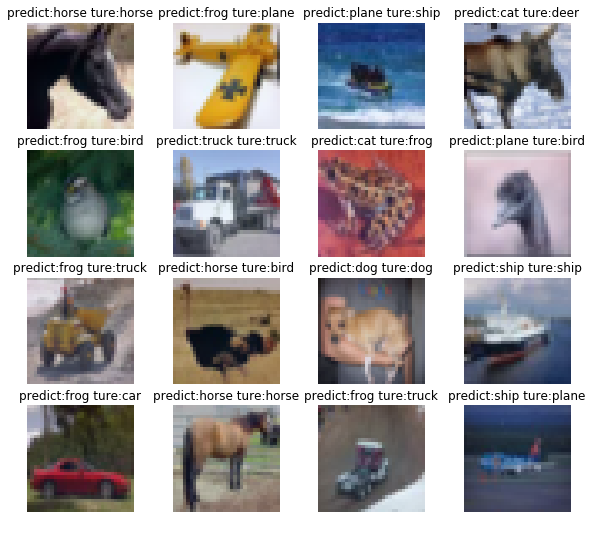

In [49]:
pre_Y_test = best_svm.predict(X_test)
accuracy_test = np.mean(Y_test == pre_Y_test)
print('在测试集上的准确度为%f' % (accuracy_test, ))

num_pic = 16
size = int(np.sqrt(num_pic))
img_random_index = np.random.choice(range(X_test.shape[0]), num_pic)
img_random = X_test[img_random_index][:, :-1]
test_min = np.min(img_random)
test_max = np.max(img_random)
for i in range(size):
    for j in range(size):
        index = i * 4 + j
        plt.subplot(size, size, index + 1)
        img = img_random[index]
        img = np.reshape(img, (32,32,3))
        wimg = 255.0 * (img - test_min) / (test_max - test_min)
        plt.imshow(wimg.astype('uint'))
        plt.axis('off')
        plt.title('predict:%s ture:%s' % (classes[int(pre_Y_test[img_random_index[index]])], classes[int(Y_test[img_random_index[index]])]))
        